# Libraries

In [115]:
pip install scienceplots

In [116]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from datetime import datetime
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta
import scienceplots

In [117]:
plt.style.use([ 'notebook', 'grid','bright'])

# Analysing the Stock

In [118]:
petr4 = yf.download("PETR4.SA", start="2021-06-16", end='2023-06-17', progress=False)
petr4

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-16,29.080000,29.290001,28.770000,29.139999,11.951166,77432900
2021-06-17,29.010000,29.200001,27.910000,28.129999,11.536935,95264600
2021-06-18,28.000000,28.420000,27.639999,28.320000,11.614860,115250700
2021-06-21,28.400000,29.000000,28.400000,28.950001,11.873243,50709600
2021-06-22,29.000000,29.270000,28.670000,29.100000,11.934760,41602700
...,...,...,...,...,...,...
2023-06-12,30.219999,30.990000,30.040001,30.809999,28.916424,119350400
2023-06-13,29.240000,29.240000,28.590000,28.860001,28.860001,79174900
2023-06-14,28.940001,30.100000,28.879999,30.100000,30.100000,98326000


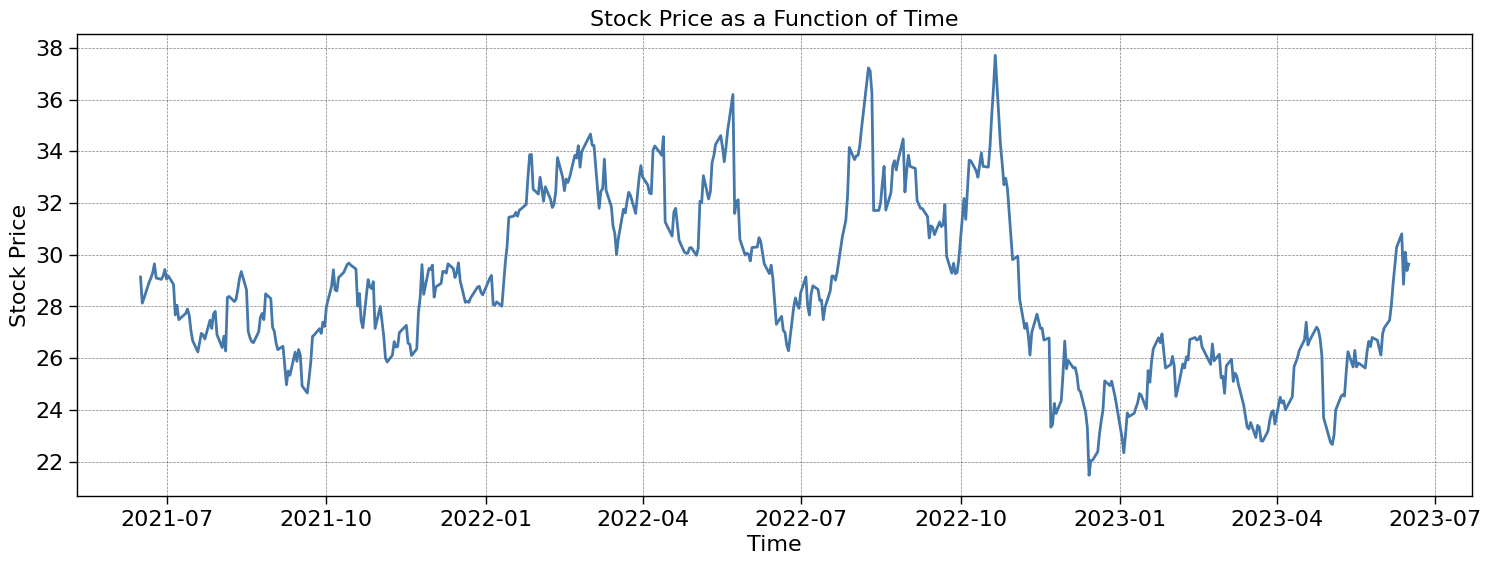

In [119]:
plt.figure(figsize=(18,6))
plt.plot( petr4.index, petr4.Close )
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Price as a Function of Time')
plt.show();

In [120]:
def historical_volatility( stock_series, start_date_str = '2022-06-16', end_date_str='2023-06-16', days=365 ):
  date = datetime.strptime(start_date_str, '%Y-%m-%d')
  end_date = datetime.strptime(end_date_str,'%Y-%m-%d')
  volatility={}
  while date <= end_date:
    year_hist = stock_series.loc[date - timedelta(days=days): date,]
    sample = np.log(year_hist).diff(periods=1).dropna()
    volatility[ f'{date}' ] = sample.std()*np.sqrt(252)
    date += timedelta(days=1)
  volatility_series = pd.Series( volatility )
  volatility_series.index = pd.to_datetime( volatility_series.index )
  return volatility_series

In [121]:
petr4['Volatility'] = historical_volatility( petr4.Close, days=365 )
petr4 = petr4[ petr4.Volatility > 0 ]
petr4 = petr4[ ['Close', 'Volatility'] ]
petr4

,Close,Volatility
Date,,
2022-06-17,27.309999,0.392343
2022-06-20,27.620001,0.392608
2022-06-21,27.070000,0.392328
2022-06-22,26.990000,0.392299
2022-06-23,26.490000,0.392667
...,...,...
2023-06-12,30.809999,0.463662
2023-06-13,28.860001,0.467407
2023-06-14,30.100000,0.469190


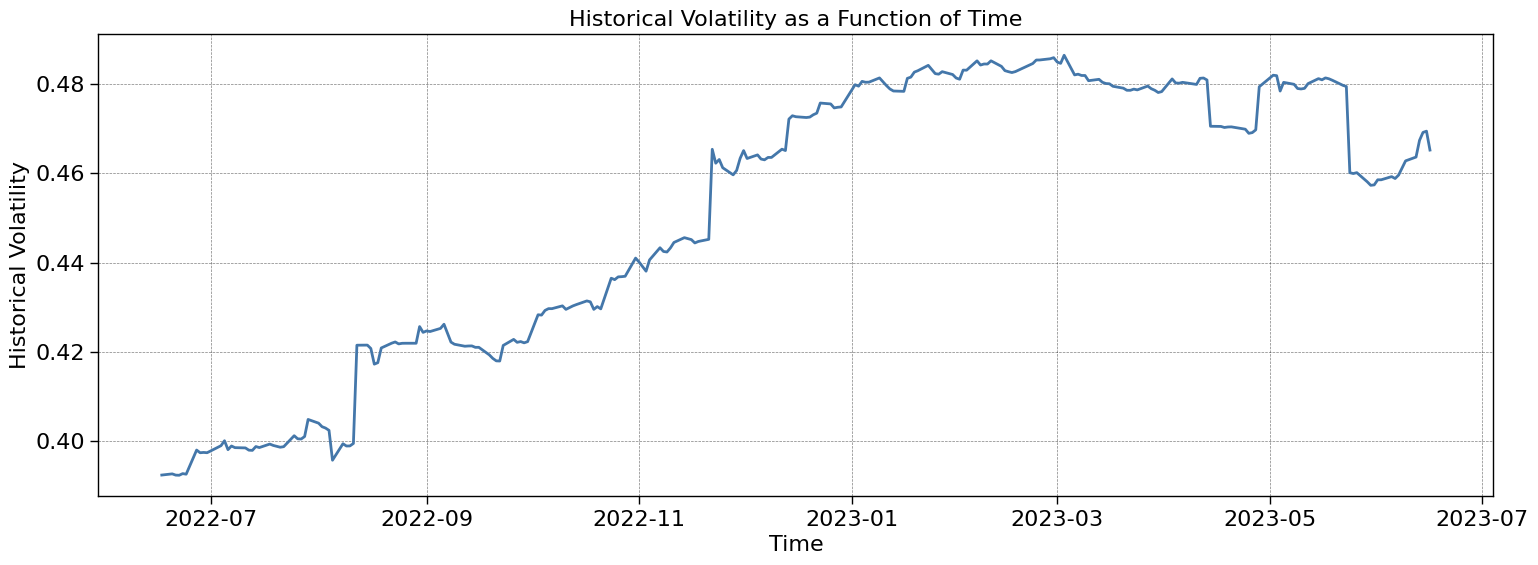

In [122]:
plt.figure(figsize=(18,6))
plt.plot( petr4.index, petr4.Volatility)
plt.xlabel('Time')
plt.ylabel('Historical Volatility')
plt.title('Historical Volatility as a Function of Time')
plt.show();

# Analysing the Option

## HTML

In [123]:
df = pd.read_html('https://opcoes.net.br/PETRF463')[0]
df

Unnamed: 0_level_0 PETRF463 - Cotação não ajustada                      \
   Unnamed: 0_level_1                             Min  Pri  Med  Ult  Max   
0          16/06/2023                             406  406  441  442  459   
1          15/06/2023                             398  511  481  420  560   
2          14/06/2023                             346  387  457  484  487   
3          13/06/2023                             324  385  361  378  403   
4          12/06/2023                             295  323  363  385  404   
..                ...                             ...  ...  ...  ...  ...   
87         29/06/2022                             192  195  193  192  195   
88         21/06/2022                             170  170  170  170  170   
89         17/06/2022                             130  130  143  147  147   
90                Min                              14   15   16   16   17   
91                Max                             630  630  630  630  630   

                            PETRF463 - Volatilidade implícita           \
   Negócios       Vol. Fin.                               Min      Pri   
0    52.000     328.347,000                               NaN      NaN   
1     2.172   2.247.451,000                           10550.0  14400.0   
2   728.000   1.547.656,000                            6900.0   9412.0   
3   476.000     903.378,000                            5500.0   6900.0   
4   209.000     698.099,000                            3400.0   3400.0   
..      ...             ...                               ...      ...   
87    2.000       3.870,000                            3744.0   3774.0   
88    1.000       8.500,000                            3710.0   3710.0   
89    5.000      51.755,000                            3496.0   3496.0   
90    1.000           94000                            1900.0   2449.0   
91   17.716  12.963.861,000                           10550.0  14400.0   

                              PETR4 - Cotação não ajustada                    \
        Med      Ult      Max                          Min   Abe   Med   Ult   
0       NaN      NaN      NaN                         2904  2923  2960  2964   
1   13380.0  14412.0  17750.0                         2928  3020  3003  2939   
2    9023.0  10575.0  11150.0                         2888  2894  2973  3010   
3    6918.0   7431.0   8300.0                         2859  2924  2882  2886   
4    4618.0   5888.0   6406.0                         3004  3022  3049  3081   
..      ...      ...      ...                          ...   ...   ...   ...   
87   3759.0   3744.0   3774.0                         2784  2848  2830  2808   
88   3710.0   3710.0   3710.0                         2669  2780  2727  2707   
89   3554.0   3563.0   3572.0                         2613  2817  2706  2731   
90   2753.0   2444.0   2802.0                         2083  2100  2182  2204   
91  13380.0  14412.0  17750.0                         3412  3415  3497  3542   

          
     Max  
0   2992  
1   3085  
2   3010  
3   2924  
4   3099  
..   ...  
87  2882  
88  2816  
89  2845  
90  2237  
91  3556  

[92 rows x 18 columns]

## CSV

In [124]:
# df = pd.read_csv('PETRF463.csv', header=[0,1], index_col=0)
# df

## Cleaning the Data

In [125]:
strike = 25.18
maturity = datetime.strptime( '16/06/2023', '%d/%m/%Y')

In [126]:
date = df.iloc[0:-2].loc[:, 'Unnamed: 0_level_0'].rename( columns={ 'Unnamed: 0_level_1' : 'Date' } )
date['Date'] = pd.to_datetime(date['Date'], format= '%d/%m/%Y')
option = df.iloc[0:-2].loc[:,'PETRF463 - Cotação não ajustada'].rename( columns={ 'Min':'Min', 'Pri':'Open', 'Med':'Mean', 'Ult':'Close',  'Max':'Max', 'Negócios':'Vol', 'Vol. Fin.':'Fin_Vol'} )
option.loc[:,['Min','Open','Mean','Close','Max']] = option.loc[:,['Min','Open','Mean','Close','Max']]*0.01
option.index = date.Date
imp_vol = df.iloc[0:-2].loc[:,'PETRF463 - Volatilidade implícita'].rename( columns={ 'Min':'Min', 'Pri':'Open', 'Med':'Mean', 'Ult':'Close',  'Max':'Max'} )
imp_vol = imp_vol*0.0001
imp_vol.index = date.Date
imp_vol = imp_vol[ imp_vol.index < maturity ]
stock = df.iloc[0:-2].loc[:, 'PETR4 - Cotação não ajustada'].rename( columns={ 'Min':'Min', 'Abe':'Open', 'Med':'Mean', 'Ult':'Close',  'Max':'Max'} )
stock = stock*0.01
stock.index=date.Date

In [127]:
print(option)
print()
print(imp_vol)
print()
print(stock)

             Min  Open  Mean  Close   Max      Vol        Fin_Vol
Date                                                             
2023-06-16  4.06  4.06  4.41   4.42  4.59   52.000    328.347,000
2023-06-15  3.98  5.11  4.81   4.20  5.60    2.172  2.247.451,000
2023-06-14  3.46  3.87  4.57   4.84  4.87  728.000  1.547.656,000
2023-06-13  3.24  3.85  3.61   3.78  4.03  476.000    903.378,000
2023-06-12  2.95  3.23  3.63   3.85  4.04  209.000    698.099,000
...          ...   ...   ...    ...   ...      ...            ...
2022-08-02  2.81  2.90  2.85   2.81  2.94    8.000    514.384,000
2022-07-01  2.01  2.10  2.01   2.02  2.10   10.000     68.528,000
2022-06-29  1.92  1.95  1.93   1.92  1.95    2.000      3.870,000
2022-06-21  1.70  1.70  1.70   1.70  1.70    1.000      8.500,000
2022-06-17  1.30  1.30  1.43   1.47  1.47    5.000     51.755,000

[90 rows x 7 columns]

               Min    Open    Mean   Close     Max
Date                                              
2023-06-15  1.05

## Black-Scholes Function

In [128]:
def BS( strike, stock, volatility, maturity, r=0.1375, increment_days=0):

  first_day = maturity - timedelta(days=365)
  first_day_to_maturity = np.busday_count( first_day.date(), maturity.date() )

  # present_date = datetime.strptime( str(stock.index.date[0]), '%Y-%m-%d')
  # present_to_maturity = np.busday_count( present_date.date(), maturity.date() )

  pre_time = []
  for indice in stock.index:
    present_date = datetime.strptime( str(indice.date() ), '%Y-%m-%d')
    present_to_maturity = np.busday_count( present_date.date()+timedelta(days=increment_days), maturity.date() )
    pre_time += [
      {f'Date': indice,
    'present_to_maturity': present_to_maturity,
      }
      ]

  time = pd.DataFrame(pre_time)
  time.set_index('Date',inplace=True)
  time.index = pd.DatetimeIndex(time.index)

  time['time_left'] = time.present_to_maturity/first_day_to_maturity

  d_1 = ( np.log( stock/strike ) + (r + (volatility**2)/2)*( time.time_left ) )/( volatility*np.sqrt( time.time_left ) )
  d_2 = d_1 - volatility*np.sqrt( time.time_left )
  price = norm.cdf( d_1 )*stock - norm.cdf( d_2 )*strike*np.exp( -r*time.time_left )

  return price

In [129]:
option = pd.DataFrame(option.Close)
option['Implied_volatility'] = imp_vol.Close
BS_price = pd.DataFrame( BS(strike=strike, stock=petr4.Close, volatility=petr4.Volatility, maturity=maturity), columns=['BS_price'] ).dropna()
option = pd.concat( [BS_price, option], axis=1 ).fillna(method='ffill')
option['Strike'] = strike
option['Maturity'] = maturity
option

,BS_price,Close,Implied_volatility,Strike,Maturity
Date,,,,,
2022-06-17,7.068878,1.47,0.3563,25.18,2023-06-16
2022-06-20,7.298712,1.47,0.3563,25.18,2023-06-16
2022-06-21,6.856613,1.70,0.3710,25.18,2023-06-16
2022-06-22,6.781527,1.70,0.3710,25.18,2023-06-16
2022-06-23,6.392616,1.70,0.3710,25.18,2023-06-16
...,...,...,...,...,...
2023-06-12,5.683081,3.85,0.5888,25.18,2023-06-16
2023-06-13,3.720964,3.78,0.7431,25.18,2023-06-16
2023-06-14,4.946519,4.84,1.0575,25.18,2023-06-16


# Analysing the Greeks

## Delta and Gamma

In [130]:
date = '2023-06-12'

pre_df_delta = []
for stock_price in np.arange(0.01, 2*strike, 0.01):
  dic={}
  reduced_petr4 = petr4[ petr4.index== date ].copy()
  reduced_petr4['Stock_price'] = stock_price
  option_price = BS( strike=strike, stock=reduced_petr4.Stock_price, volatility=reduced_petr4.Volatility, maturity=maturity )
  dic['Stock_price'] = stock_price
  dic['Option_price'] = option_price.values[0]
  pre_df_delta.append( dic )

df_delta = pd.DataFrame( pre_df_delta )
df_delta['Date'] = reduced_petr4.index.values[0]
df_delta.set_index( "Date", inplace=True)

df_delta['Diff_stock_price'] = df_delta.Stock_price.diff()
df_delta['Diff_option_price'] = df_delta.Option_price.diff()
df_delta['Delta'] = df_delta.Diff_option_price/df_delta.Diff_stock_price
df_delta['Delta_whole'] = 100*df_delta.Delta

df_delta['Diff_delta'] = df_delta.Delta.diff()
df_delta['Gamma'] = df_delta.Delta.diff()/df_delta.Diff_stock_price

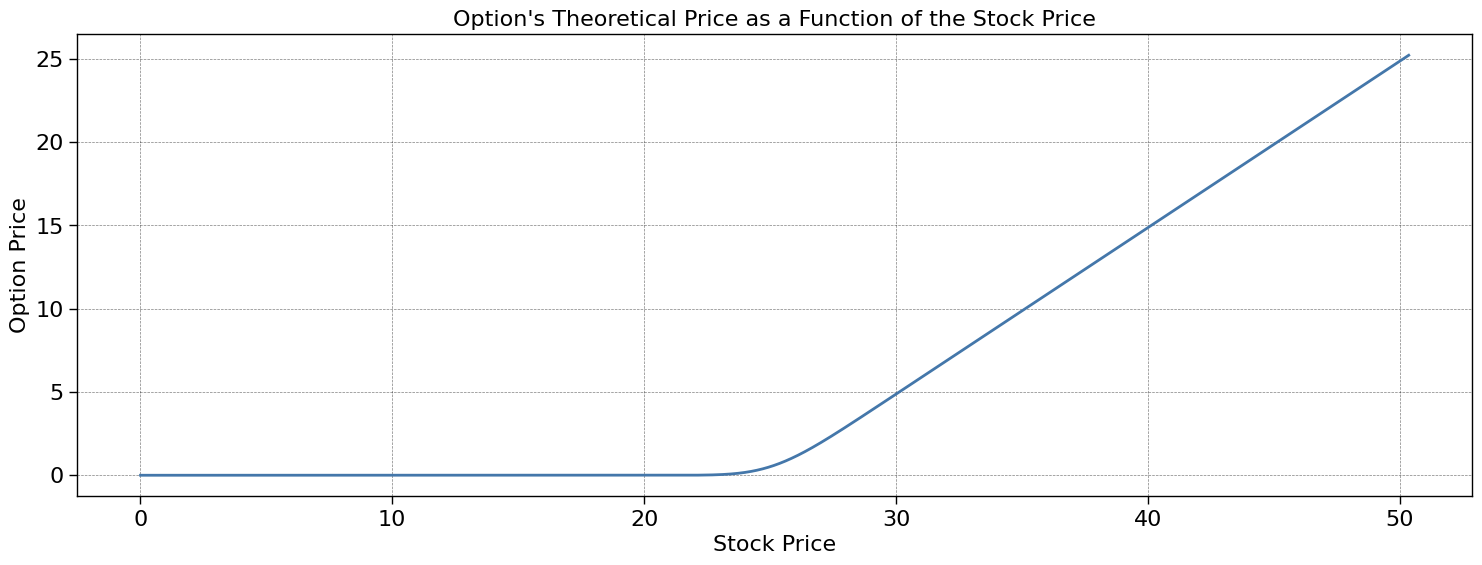

In [131]:
plt.figure(figsize=(18,6))
plt.plot( df_delta.Stock_price, df_delta.Option_price)
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.title("Option's Theoretical Price as a Function of the Stock Price")
plt.show()

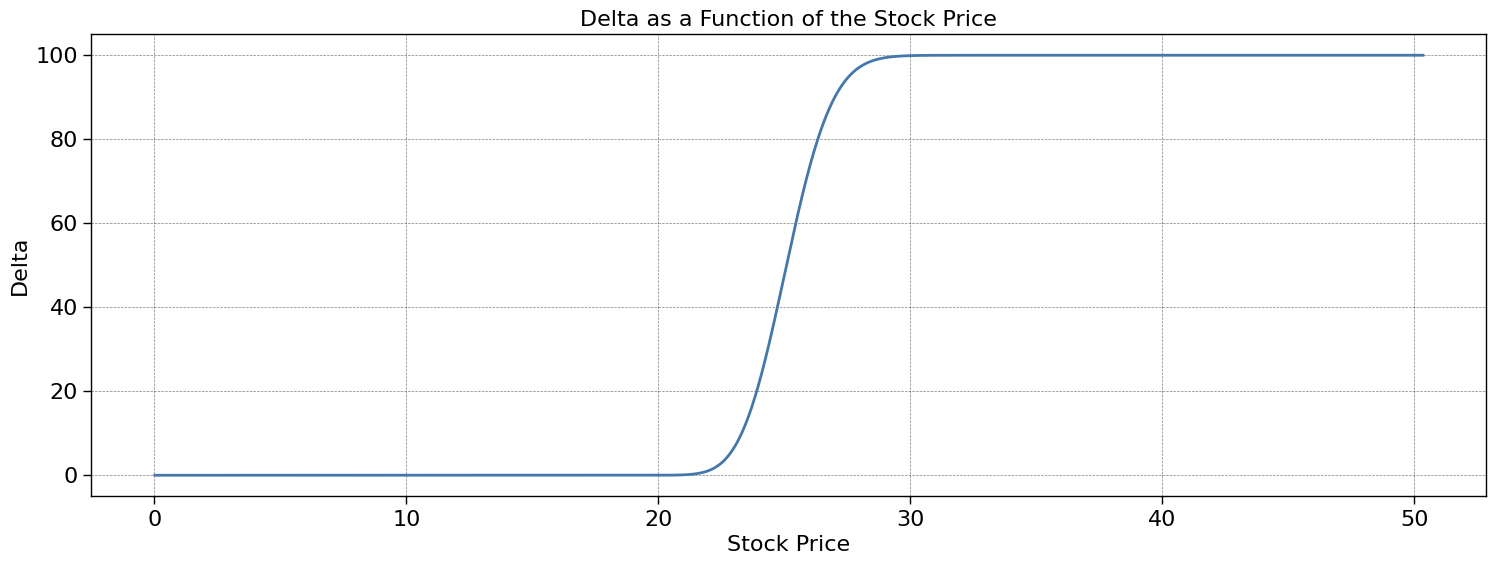

In [132]:
plt.figure(figsize=(18,6))
plt.plot( df_delta.Stock_price, df_delta.Delta_whole )
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta as a Function of the Stock Price')
plt.show()

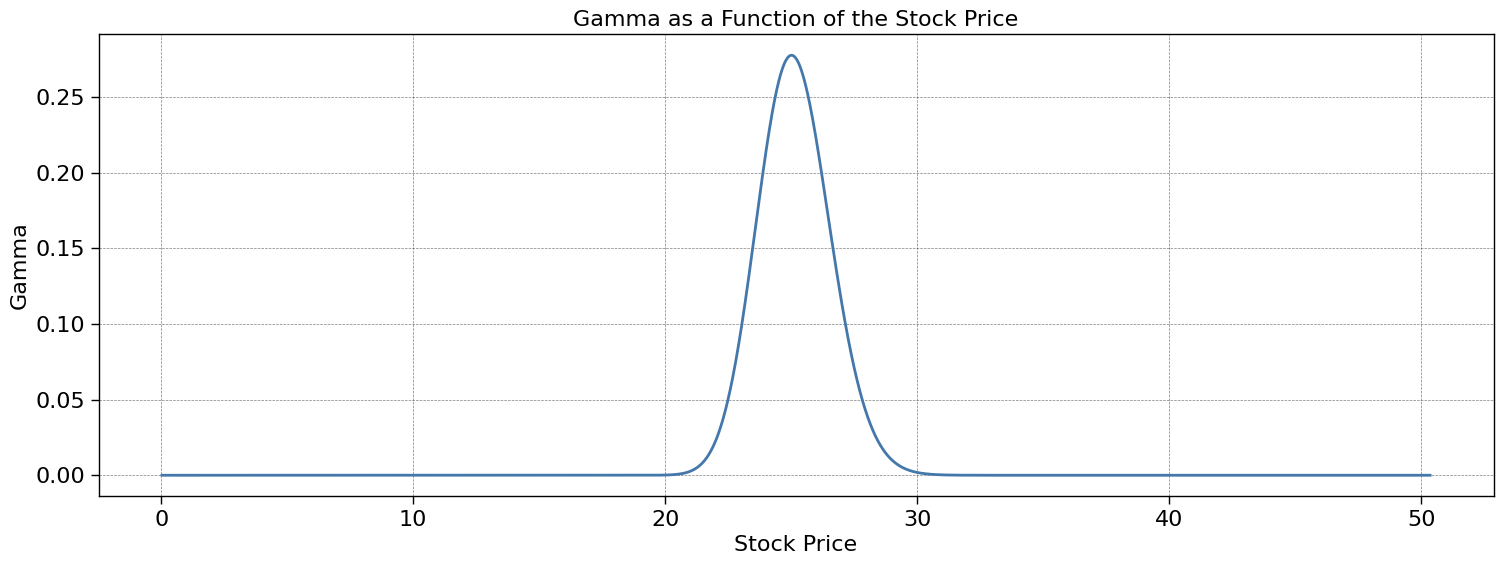

In [133]:
plt.figure(figsize=(18,6))
plt.plot( df_delta.Stock_price, df_delta.Gamma )
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma as a Function of the Stock Price')
plt.show()

In [134]:
df_delta[ (25 < df_delta.Stock_price) & (df_delta.Stock_price < 26) ]

,Stock_price,Option_price,Diff_stock_price,Diff_option_price,Delta,Delta_whole,Diff_delta,Gamma
Date,,,,,,,,
2023-06-12,25.00,0.512593,0.01,0.004749,0.474860,47.485982,0.002775,0.277504
2023-06-12,25.01,0.517369,0.01,0.004776,0.477635,47.763497,0.002775,0.277515
2023-06-12,25.02,0.522173,0.01,0.004804,0.480410,48.041009,0.002775,0.277513
2023-06-12,25.03,0.527005,0.01,0.004832,0.483185,48.318506,0.002775,0.277497
2023-06-12,25.04,0.531865,0.01,0.004860,0.485960,48.595973,0.002775,0.277467
...,...,...,...,...,...,...,...,...
2023-06-12,25.95,1.086024,0.01,0.007213,0.721338,72.133813,0.002260,0.225998
2023-06-12,25.96,1.093260,0.01,0.007236,0.723588,72.358836,0.002250,0.225022
2023-06-12,25.97,1.100518,0.01,0.007258,0.725829,72.582877,0.002240,0.224041


## Vega

In [135]:
date= '2023-06-12'

pre_df_vega = []
for volatility in np.arange(0, 2.01, 0.01):
  dic={}
  reduced_petr4 = petr4[ petr4.index== date ].copy()
  reduced_petr4['Volatility'] = volatility
  option_price = BS( strike=strike, stock=reduced_petr4.Close, volatility=reduced_petr4.Volatility, maturity=maturity )
  dic['Volatility'] = volatility
  dic['Option_price'] = option_price.values[0]
  pre_df_vega.append( dic )

df_vega = pd.DataFrame( pre_df_vega )
df_vega['Date'] = reduced_petr4.index.values[0]
df_vega.set_index('Date', inplace=True)

df_vega['Diff_volatility'] = df_vega.Volatility.diff()
df_vega['Diff_option_price'] = df_vega.Option_price.diff()
df_vega['Vega'] = df_vega.Diff_option_price/df_vega.Diff_volatility

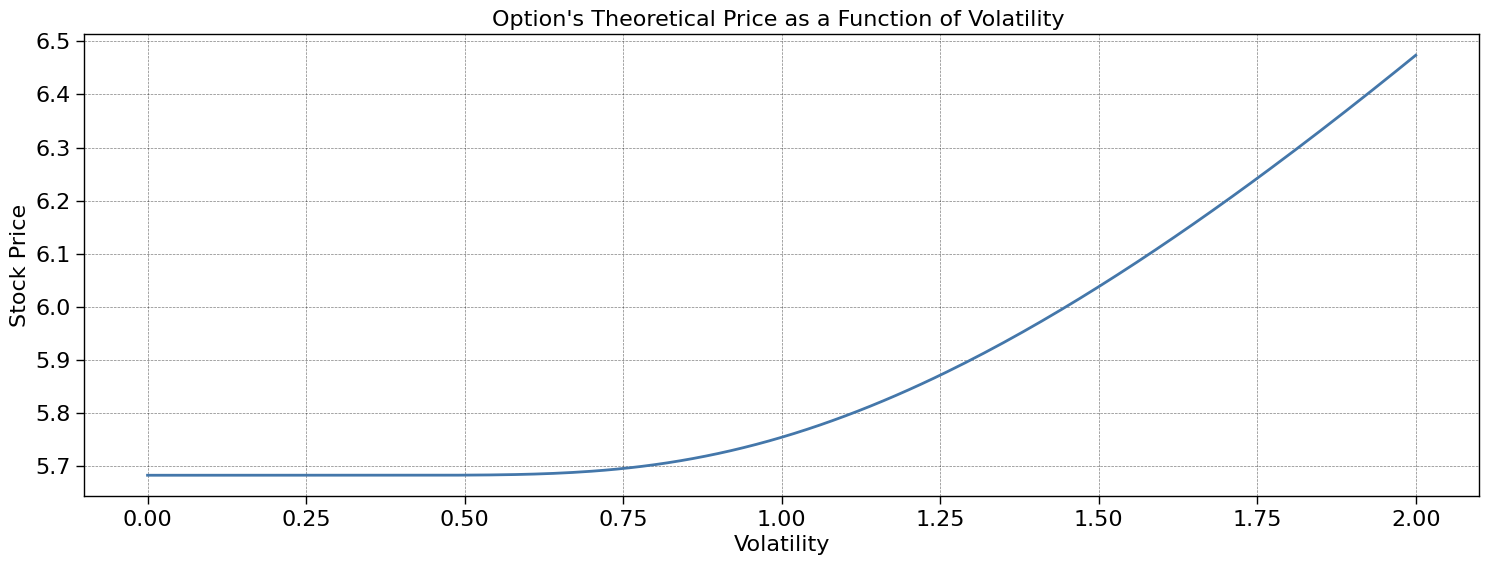

In [136]:
plt.figure(figsize=(18,6))
plt.plot( df_vega.Volatility, df_vega.Option_price)
plt.xlabel('Volatility')
plt.ylabel('Stock Price')
plt.title("Option's Theoretical Price as a Function of Volatility ")
plt.show()

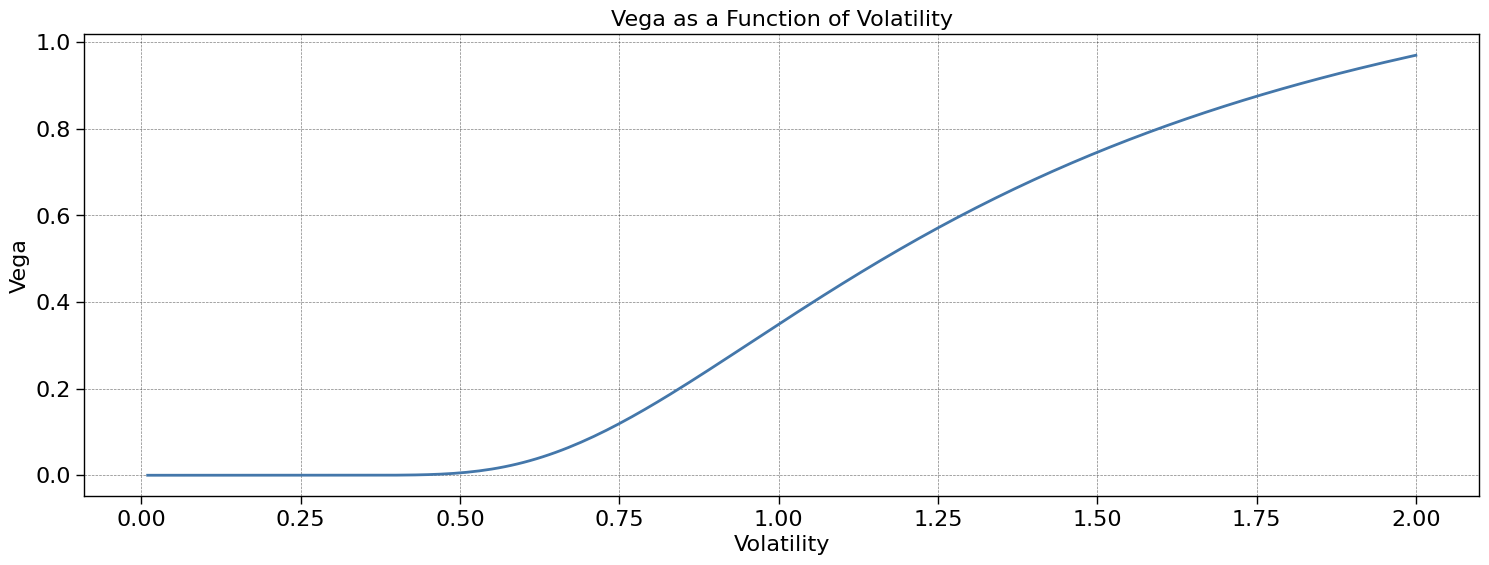

In [137]:
plt.figure(figsize=(18,6))
plt.plot( df_vega.Volatility, df_vega.Vega )
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega as a Function of Volatility')
plt.show()

In [138]:
df_vega

,Volatility,Option_price,Diff_volatility,Diff_option_price,Vega
Date,,,,,
2023-06-12,0.00,5.683005,NaN,NaN,NaN
2023-06-12,0.01,5.683005,0.01,0.000000,0.000000
2023-06-12,0.02,5.683005,0.01,0.000000,0.000000
2023-06-12,0.03,5.683005,0.01,0.000000,0.000000
2023-06-12,0.04,5.683005,0.01,0.000000,0.000000
...,...,...,...,...,...
2023-06-12,1.96,6.435131,0.01,0.009566,0.956609
2023-06-12,1.97,6.444730,0.01,0.009600,0.959990
2023-06-12,1.98,6.454364,0.01,0.009633,0.963329


## Theta

In [139]:
date= '2023-05-15'

pre_df_theta = []
#for day in range( (maturity - petr4.index[-5] ).days ):
for day in range( (maturity - petr4[ petr4.index == date ].index[0] ).days ):
  dic={}
  reduced_petr4 = petr4[ petr4.index== date ].copy()
  reduced_petr4.index = reduced_petr4.index + timedelta(day)
  option_price = BS( strike=strike, stock=reduced_petr4.Close, volatility=reduced_petr4.Volatility, maturity=maturity )
  dic['Date'] = reduced_petr4.index.values[0]
  dic['Option_price'] = option_price.values[0]
  pre_df_theta.append( dic )

df_theta = pd.DataFrame( pre_df_theta )
df_theta.set_index('Date', inplace=True )

df_theta['Stock_price'] = reduced_petr4.Close.values[0]
df_theta['Diff_option_price'] = df_theta.Option_price.diff()
df_theta['Theta'] = df_theta.Diff_option_price

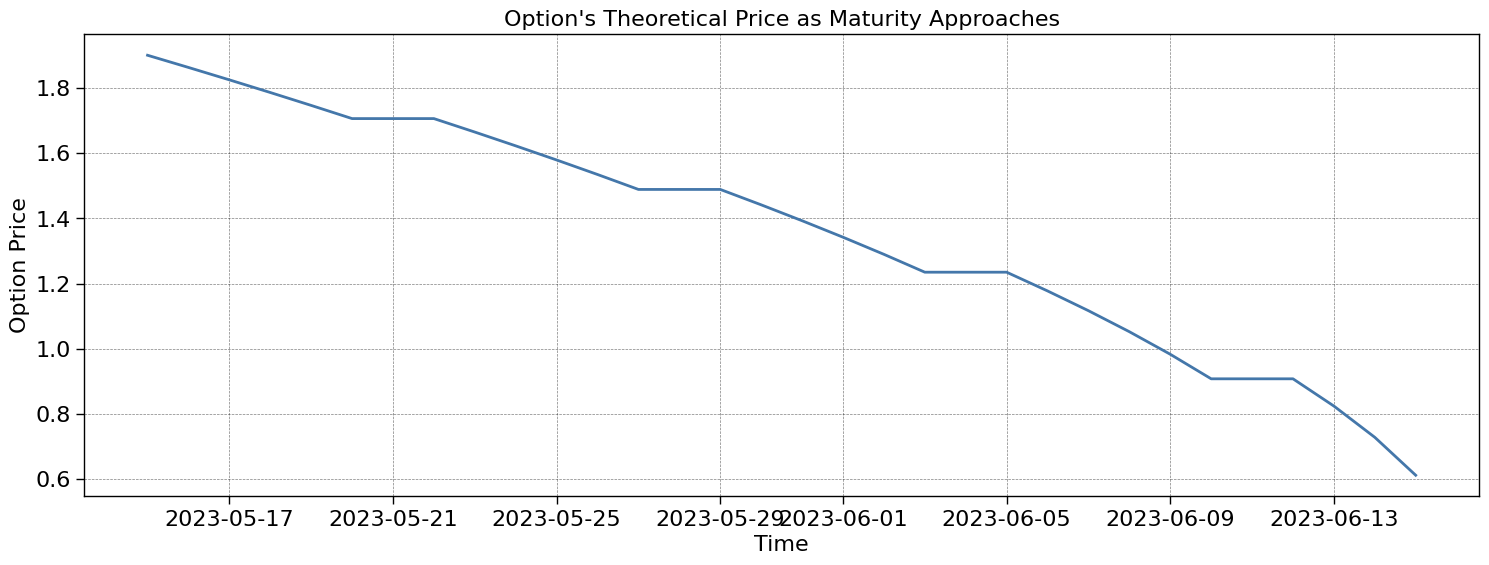

In [140]:
plt.figure(figsize=(18,6))
plt.plot( df_theta.index, df_theta.Option_price)
plt.xlabel('Time')
plt.ylabel('Option Price')
plt.title("Option's Theoretical Price as Maturity Approaches")
plt.show()

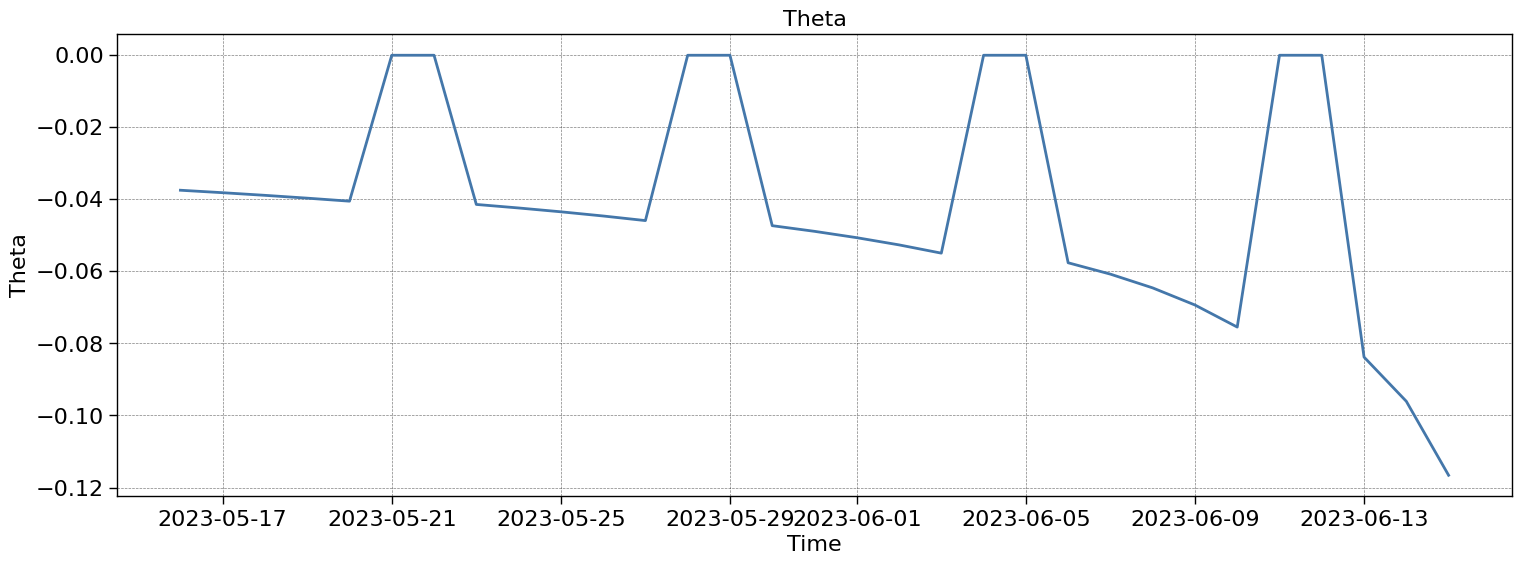

In [141]:
plt.figure(figsize=(18,6))
plt.plot( df_theta.index, df_theta.Theta )
plt.xlabel('Time')
plt.ylabel('Theta')
plt.title('Theta')
plt.show()

In [142]:
df_theta

,Option_price,Stock_price,Diff_option_price,Theta
Date,,,,
2023-05-15,1.901701,25.66,NaN,NaN
2023-05-16,1.864228,25.66,-0.037473,-0.037473
2023-05-17,1.826070,25.66,-0.038158,-0.038158
2023-05-18,1.787180,25.66,-0.038889,-0.038889
2023-05-19,1.747509,25.66,-0.039672,-0.039672
2023-05-20,1.706997,25.66,-0.040512,-0.040512
2023-05-21,1.706997,25.66,0.000000,0.000000
2023-05-22,1.706997,25.66,0.000000,0.000000
2023-05-23,1.665580,25.66,-0.041417,-0.041417


## Rho

In [143]:
date = '2023-06-12'

pre_df_rho = []
for interest_rate in np.arange(0, 1, 0.001):
  dic={}
  reduced_petr4 = petr4[ petr4.index== date ].copy()
  reduced_petr4['Interest_rate'] = interest_rate
  option_price = BS( strike=strike, stock=reduced_petr4.Close, volatility=reduced_petr4.Volatility, maturity=maturity, r = interest_rate )
  dic['Interest_rate'] = reduced_petr4.Interest_rate.values[0]
  dic['Option_price'] = option_price.values[0]
  pre_df_rho.append( dic )

df_rho = pd.DataFrame( pre_df_rho )
df_rho['Date'] = reduced_petr4.index.values[0]
df_rho.index = df_rho.Date

df_rho['Diff_option_price'] = df_rho.Option_price.diff()
df_rho['Diff_interest_rate'] = df_rho.Interest_rate.diff()
df_rho['Rho'] = df_rho.Diff_option_price/df_rho.Diff_interest_rate

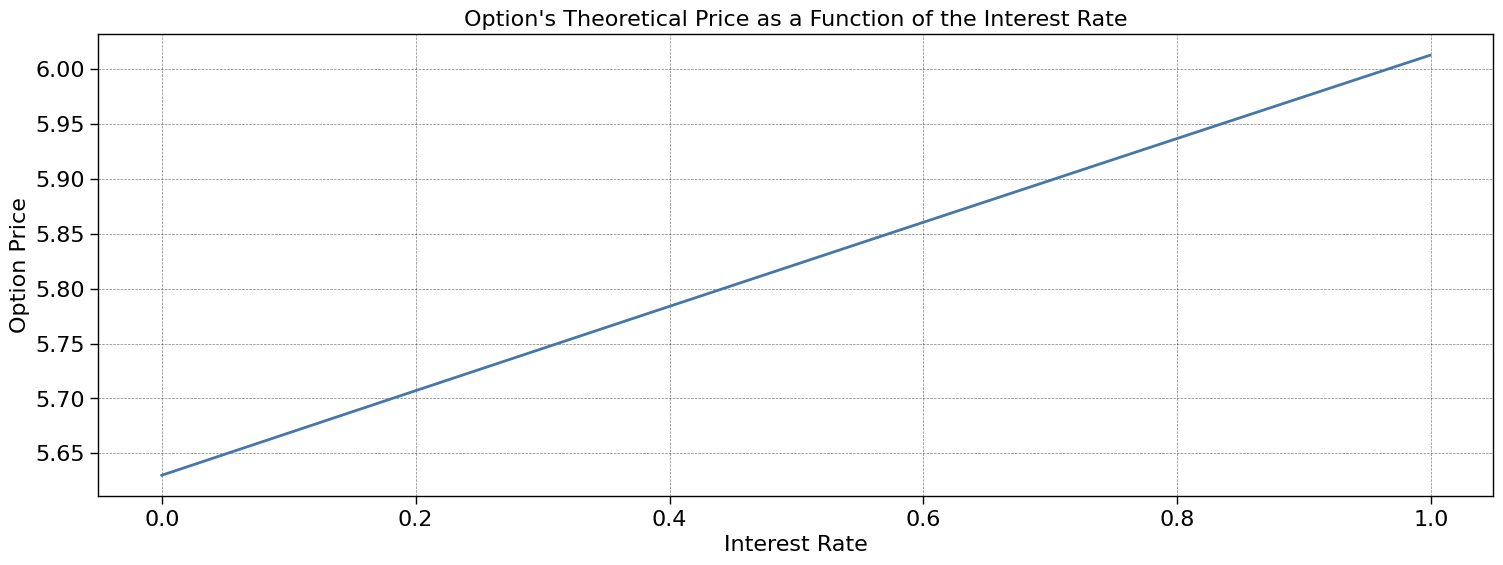

In [144]:
plt.figure(figsize=(18,6))
plt.plot( df_rho.Interest_rate, df_rho.Option_price)
plt.xlabel('Interest Rate')
plt.ylabel('Option Price')
plt.title("Option's Theoretical Price as a Function of the Interest Rate")
plt.show()

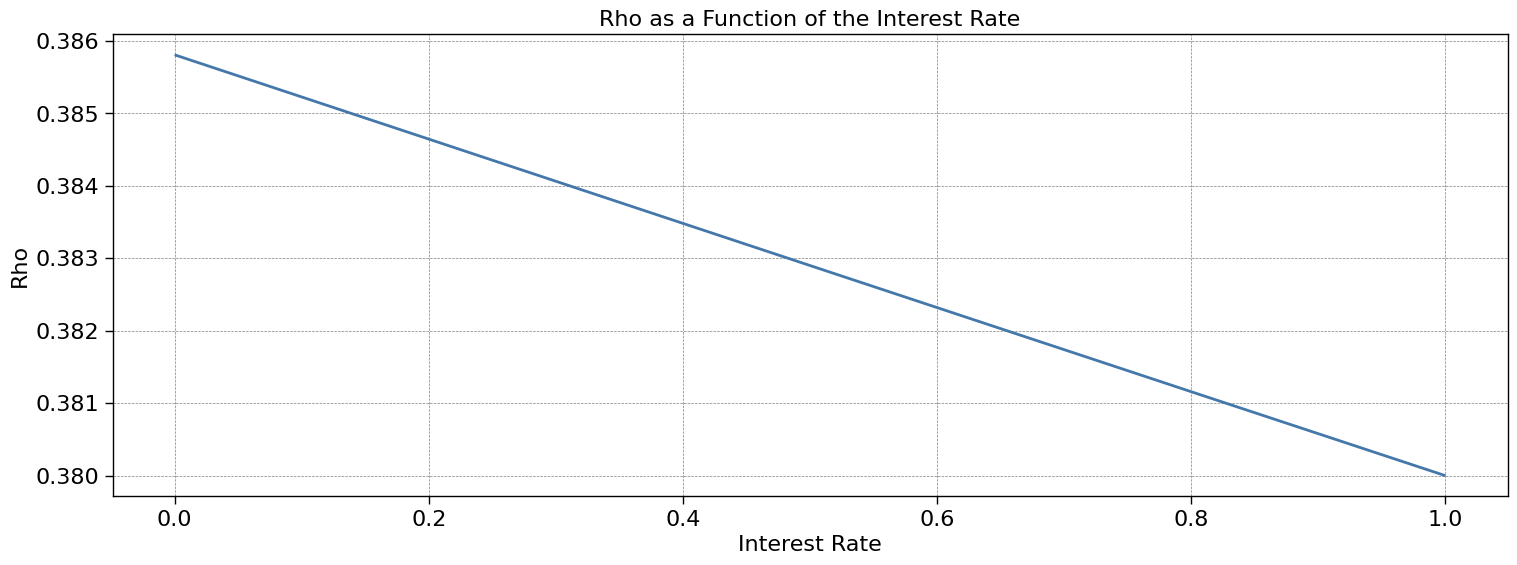

In [145]:
plt.figure(figsize=(18,6))
plt.plot( df_rho.Interest_rate, df_rho.Rho )
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho as a Function of the Interest Rate')
plt.show()

In [146]:
df_rho

,Interest_rate,Option_price,Date,Diff_option_price,Diff_interest_rate,Rho
Date,,,,,,
2023-06-12,0.000,5.630087,2023-06-12,NaN,NaN,NaN
2023-06-12,0.001,5.630473,2023-06-12,0.000386,0.001,0.385803
2023-06-12,0.002,5.630859,2023-06-12,0.000386,0.001,0.385797
2023-06-12,0.003,5.631245,2023-06-12,0.000386,0.001,0.385792
2023-06-12,0.004,5.631631,2023-06-12,0.000386,0.001,0.385786
...,...,...,...,...,...,...
2023-06-12,0.995,6.011087,2023-06-12,0.000380,0.001,0.380030
2023-06-12,0.996,6.011467,2023-06-12,0.000380,0.001,0.380024
2023-06-12,0.997,6.011847,2023-06-12,0.000380,0.001,0.380018


# The End

In [147]:
imp_vol

,Min,Open,Mean,Close,Max
Date,,,,,
2023-06-15,1.0550,1.4400,1.3380,1.4412,1.7750
2023-06-14,0.6900,0.9412,0.9023,1.0575,1.1150
2023-06-13,0.5500,0.6900,0.6918,0.7431,0.8300
2023-06-12,0.3400,0.3400,0.4618,0.5888,0.6406
2023-06-09,0.2687,0.3106,0.3600,0.4231,0.4859
...,...,...,...,...,...
2022-08-02,0.2752,0.2752,0.2781,0.2754,0.2802
2022-07-01,0.3656,0.3736,0.3664,0.3663,0.3736
2022-06-29,0.3744,0.3774,0.3759,0.3744,0.3774


In [148]:
petr4_final_df = petr4.copy()
petr4_final_df['Close'] = np.round(petr4_final_df.Close, decimals=2)
petr4_final_df['Volatility'] = np.round(petr4_final_df.Volatility, decimals=4)



option['Delta'] = np.round(
                          ( BS( strike, petr4_final_df.Close+0.01, petr4_final_df.Volatility, maturity=maturity )
                          - BS( strike, petr4_final_df.Close, petr4_final_df.Volatility, maturity=maturity ) )/0.01,
                          decimals=2)

option['Gamma'] = np.round(
                          ( BS( strike, petr4_final_df.Close+0.02, petr4_final_df.Volatility, maturity=maturity )
                          - 2*BS( strike, petr4_final_df.Close+0.01, petr4_final_df.Volatility, maturity=maturity )
                          + BS( strike, petr4_final_df.Close, petr4_final_df.Volatility, maturity=maturity ) )/( 0.01**2 ),
                          decimals=2)

option['Vega'] = np.round(
                        ( BS( strike, petr4_final_df.Close, petr4_final_df.Volatility+0.0001, maturity=maturity )
                        - BS( strike, petr4_final_df.Close, petr4_final_df.Volatility, maturity=maturity ) )/0.0001,
                        decimals=4)

option['Theta'] = np.round(
                        ( BS( strike, petr4_final_df.Close, petr4_final_df.Volatility, maturity=maturity, increment_days=1)
                        - BS( strike, petr4_final_df.Close, petr4_final_df.Volatility, maturity=maturity ) ),
                        decimals=2)

option['Rho'] = np.round(
                        ( BS( strike, petr4_final_df.Close, petr4_final_df.Volatility, maturity=maturity, r=0.1375+0.0001)
                        - BS( strike, petr4_final_df.Close, petr4_final_df.Volatility, maturity=maturity ) )/0.0001,
                        decimals=2)

petr4_final_df = pd.concat( {'PETR4':petr4_final_df}, axis=1, names=['TICKER', "Metrics"])
petr4_final_df

option_final_df = pd.concat({"PETRF463": option}, axis=1, names=["TICKER", "Metrics"])
option_final_df

final_df = pd.concat( [petr4_final_df, option_final_df], axis=1 )
final_df = final_df[::-1]
final_df

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


TICKER      PETR4             PETRF463                                  \
Metrics     Close Volatility  BS_price Close Implied_volatility Strike   
Date                                                                     
2023-06-16  29.64     0.4652  4.459999  4.42             1.4412  25.18   
2023-06-15  29.39     0.4695  4.223261  4.20             1.4412  25.18   
2023-06-14  30.10     0.4692  4.946519  4.84             1.0575  25.18   
2023-06-13  28.86     0.4674  3.720964  3.78             0.7431  25.18   
2023-06-12  30.81     0.4637  5.683081  3.85             0.5888  25.18   
...           ...        ...       ...   ...                ...    ...   
2022-06-23  26.49     0.3927  6.392616  1.70             0.3710  25.18   
2022-06-22  26.99     0.3923  6.781527  1.70             0.3710  25.18   
2022-06-21  27.07     0.3923  6.856613  1.70             0.3710  25.18   
2022-06-20  27.62     0.3926  7.298712  1.47             0.3563  25.18   
2022-06-17  27.31     0.3923  7.068878  1.47             0.3563  25.18   

TICKER                                                  
Metrics      Maturity Delta Gamma    Vega Theta    Rho  
Date                                                    
2023-06-16 2023-06-16  1.00 -0.00  0.0000   NaN   0.00  
2023-06-15 2023-06-16  1.00  0.00  0.0000 -0.01   0.10  
2023-06-14 2023-06-16  1.00  0.00  0.0001 -0.01   0.19  
2023-06-13 2023-06-16  1.00  0.01  0.0260 -0.01   0.29  
2023-06-12 2023-06-16  1.00  0.00  0.0025 -0.01   0.39  
...               ...   ...   ...     ...   ...    ...  
2022-06-23 2023-06-16  0.75  0.03  8.3531 -0.01  13.19  
2022-06-22 2023-06-16  0.76  0.03  8.2407 -0.01  13.64  
2022-06-21 2023-06-16  0.77  0.03  8.2316 -0.01  13.75  
2022-06-20 2023-06-16  0.78  0.03  8.0920 -0.01  14.21  
2022-06-17 2023-06-16  0.77  0.03  8.1902 -0.01  14.02  

[250 rows x 12 columns]

In [151]:
final_df.to_csv('PETRF463_BS.csv')

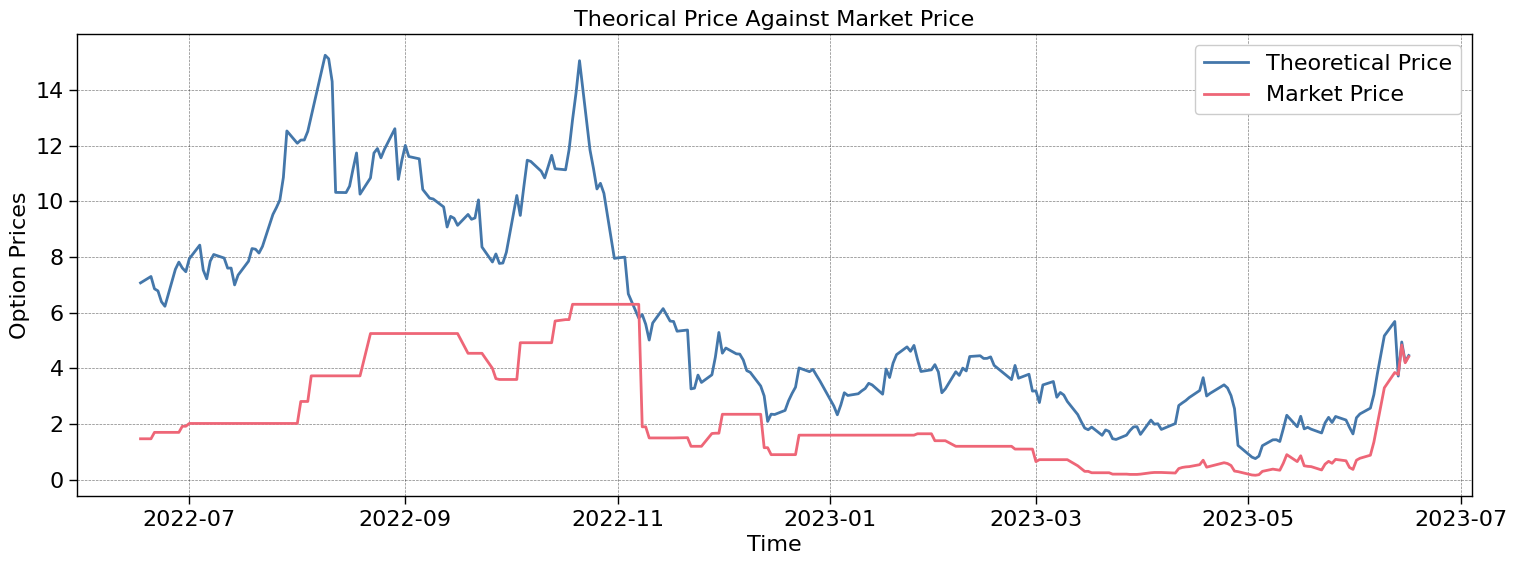

In [150]:
plt.figure(figsize=(18,6))
plt.plot( final_df.index, final_df.PETRF463.BS_price, label='Theoretical Price')
plt.plot( final_df.index, final_df.PETRF463.Close, label='Market Price')
plt.xlabel('Time')
plt.ylabel('Option Prices')
plt.title("Theorical Price Against Market Price")
plt.legend()
plt.show();